# Titanic Dataset Analysis with Scikit-Learn Pipeline

For this analysis we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).
The goal here is to carry out the analysis using SciKit-Learn data pipeline API. 
We have 2 datasets:   
* train dataset that is used to train the model. The Label is included in this dataset 
* test dataset: There is no label in the dataset. We have to upload our prediction on Kaggle to get our score. 


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data
**Training data**   
We already see looking at the first rows that on the Cabin column there are missing data.

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Test data**   
We can confirm that the label column 'Survived' is missing, and that there are also missing data in the test set.

In [3]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 12 columns: 1 label -    **Survived** and 11 features.  
We also see that there are missing data for Age, and Cabin features.   
   
**Text columns**   
In a first approximation Text columns can be assumed to be categorical.   

In [5]:
train.columns[train.dtypes == 'object']

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

* 'Name': Text but probably not useful
* 'Sex' : It's in fact a categorical column that takes 2 values male or female
* 'Ticket': Text value but probably useless for the modelisation
* 'Cabin': Text value but probably useless for the modelisation
* 'Embarked': It's in fact a categorical column  
   
**Numerical columns**

In [6]:
train.columns[train.dtypes != 'object']

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

* 'PassengerId'
* 'Survived'
* 'Pclass'
* 'Age'
* 'SibSp'
* 'Parch'
* 'Fare'

Although numeric, some of these columns (Survived and Pclass) are categorical. 


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis
  
## Missing Data
Percentage of missing data

In [8]:
100 * train.isna().sum()/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

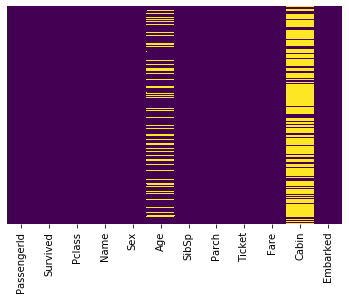

In [9]:
# Heatmap to show visually missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

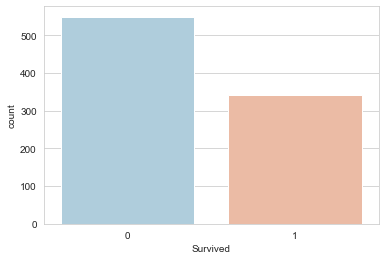

In [10]:
# countplot for Surviced (Label column )
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

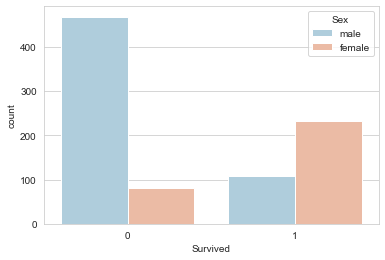

In [11]:
# Label column by sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

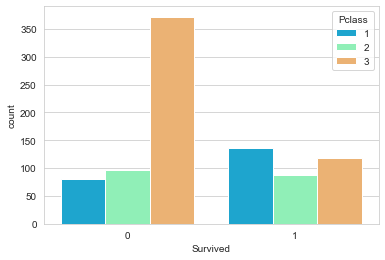

In [12]:
# Label column by Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

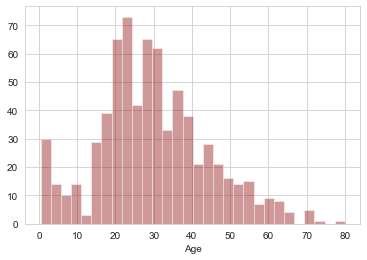

In [13]:
# Age distribution plot
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

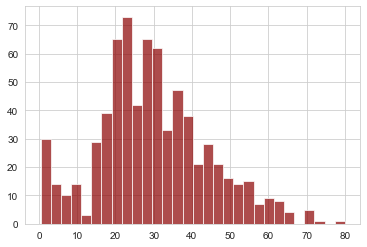

In [14]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

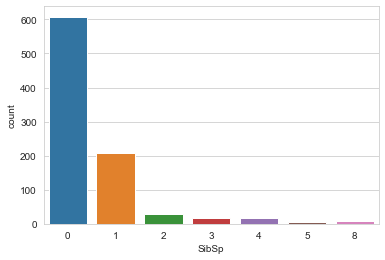

In [15]:
sns.countplot(x='SibSp',data=train)

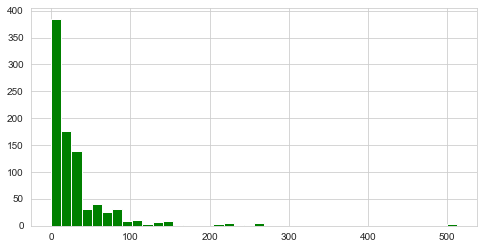

In [16]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Cufflinks for plot

In [17]:
import cufflinks as cf
cf.go_offline()

In [18]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

## Data Cleaning
Preparing the training set and the label

In [19]:
# Remove the label from the train set 
label = train['Survived'].copy()
train = train.drop('Survived', axis=1)

## Implementing a custom imputer for Age
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

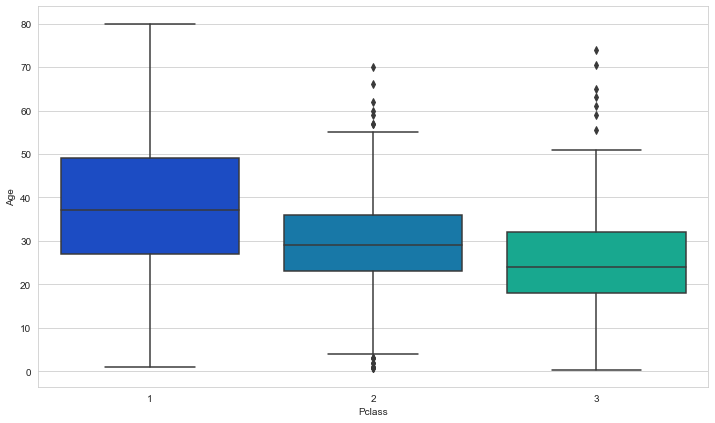

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


We could just implement a simple function that impute the median age per class to the missing Age, and use it in an Pandas apply method. But as the goal is to use SKLearn Pipeline, we will use a custom imputer instead. More specifically we will use this [one](https://towardsdatascience.com/coding-a-custom-imputer-in-scikit-learn-31bd68e541de) suggested by Eryk Lewinson.


In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

In [22]:
class GroupImputer(BaseEstimator, TransformerMixin):
    '''
    Class used for imputing missing values in a pd.DataFrame using either mean or median of a group.
    
    Parameters
    ----------    
    group_cols : list
        List of columns used for calculating the aggregated value 
    target : str
        The name of the column to impute
    metric : str
        The metric to be used for remplacement, can be one of ['mean', 'median']
    Returns
    -------
    X : array-like
        The array with imputed values in the target column
    '''
    def __init__(self, group_cols, target, metric='mean'):
        
        assert metric in ['mean', 'median'], 'Unrecognized value for metric, should be mean/median'
        assert type(group_cols) == list, 'group_cols should be a list of columns'
        assert type(target) == str, 'target should be a string'
        
        self.group_cols = group_cols
        self.target = target
        self.metric = metric
    
    def fit(self, X, y=None):
        
        assert pd.isnull(X[self.group_cols]).any(axis=None) == False, 'There are missing values in group_cols'
        
        impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric) \
                                                            .reset_index(drop=False)
        
        self.impute_map_ = impute_map
        
        return self 
    
    def transform(self, X, y=None):
        
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_map_')
        
        X = X.copy()
        
        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            X.loc[ind] = X.loc[ind].fillna(row[self.target])
        
        return X.values
    

**Testing the Imputer for Age**   
In our case the group columns will only be the Pclass column, and the target coumn will be the Age Column.

In [23]:
imp = GroupImputer(group_cols=['Pclass'], 
                   target='Age', 
                   metric='median')
train_imp = pd.DataFrame(imp.fit_transform(train), 
                      columns=train.columns)

In [24]:
print(f'train contains {sum(pd.isnull(train.Age))} missing values.')
print(f'train_imp contains {sum(pd.isnull(train_imp.Age))} missing values.')

train contains 177 missing values.
train_imp contains 0 missing values.


**There is no more missing values for Age, but were the missing value replaced according the PClass?** 
Let's check  ... 

In [25]:
train[train['Age'].isnull()].head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [26]:
train_imp[train['Age'].isnull()].head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,24,0,0,330877,8.4583,24,Q
17,18,2,"Williams, Mr. Charles Eugene",male,29,0,0,244373,13,29,S
19,20,3,"Masselmani, Mrs. Fatima",female,24,0,0,2649,7.225,24,C
26,27,3,"Emir, Mr. Farred Chehab",male,24,0,0,2631,7.225,24,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24,0,0,330959,7.8792,24,Q
29,30,3,"Todoroff, Mr. Lalio",male,24,0,0,349216,7.8958,24,S
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37,1,0,PC 17569,146.521,B78,C
32,33,3,"Glynn, Miss. Mary Agatha",female,24,0,0,335677,7.75,24,Q
36,37,3,"Mamee, Mr. Hanna",male,24,0,0,2677,7.2292,24,C
42,43,3,"Kraeff, Mr. Theodor",male,24,0,0,349253,7.8958,24,C


We see that:   
* when Pclass=3, the imputed age is 24
* when Pclass=2, the imputed age is 29
* when Pclass=3, the imputed age is 37  

So it works as expected. That's great ! 


## Dataframe selector
We already saw that we will only pick a subset of the feature for the analysis. The dataframe selector below will help us to do that when building the pipeline. 

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

## Build a pipeline for numeric features

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [29]:
train_num = train[train.columns[train.dtypes != 'object']]
num_attribs = list(train_num)

In [30]:
train_num.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


As **PassengerId**	doesn't provide any relevant information, we will remove it from the features.
We also added the **StandardScaler** in the pipeline.

In [31]:
num_pipeline = Pipeline([
        ('select_numeric', DataFrameSelector(['Pclass','Age', 'SibSp', 'Parch', 'Fare'])),
        ('imputer', GroupImputer(group_cols=['Pclass'], target='Age', metric='median')),
        ('std_scaler', StandardScaler()),
    ])

train_num_tr = num_pipeline.fit_transform(train)

In [32]:
pd_train_num_tr = pd.DataFrame(train_num_tr, columns=['Pclass','Age', 'SibSp', 'Parch', 'Fare'])

In [33]:
pd_train_num_tr.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

We double checked that there is no remaining missing data.    
   

## Build a pipeline for categorical features

In [34]:
train_cat = train[train.columns[train.dtypes == 'object']]
cat_attribs = list(train_cat)

In [35]:
train_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


We will only keep the **Sex** and **Embarked** columns from the text features.
We will encode the categorical features with the One Hot encoding. But first let's check if the imputation (using SimpleImputer) works properly for the Embarked column. We will use the  Scikit-Learn SimpleImputer to assign to missing value the "most frequent" value.

In [36]:
cat_pipeline = Pipeline([
        ('select_cat', DataFrameSelector(['Sex','Embarked'])),
        ('imputer', SimpleImputer(strategy="most_frequent")) #,
       # ('onehot', OneHotEncoder(sparse=False))
    ])

train_cat_tr = cat_pipeline.fit_transform(train)

In [37]:
pd_train_cat_tr = pd.DataFrame(train_cat_tr, columns = ['Sex','Embarked'])
train_cat_tr

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

In [38]:
pd_train_cat_tr.isnull().sum()

Sex         0
Embarked    0
dtype: int64

In [39]:
pd_train_cat_tr[train['Embarked'].isnull()].head()

,Sex,Embarked
61,female,S
829,female,S


In [40]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We have confirmed that the SimpleImputer assigned the most frequent value to the 2 missing values. Now let's build the full categorical pipeline. 

In [41]:
cat_pipeline = Pipeline([
        ('select_cat', DataFrameSelector(['Sex','Embarked'])),
        ('imputer', SimpleImputer(strategy="most_frequent")) ,
        ('onehot', OneHotEncoder(sparse=False))
    ])
train_cat_tr = cat_pipeline.fit_transform(train)

In [42]:
train_cat_tr

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

## Build the full pre-processing pipeline

In [43]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])




## Build the training data

In [44]:
X_train = preprocess_pipeline.fit_transform(train)
X_train

array([[ 0.82737724, -0.53383369,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.67489052,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.23165264, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.38274316,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.23165264, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.22161894, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [45]:
y_train = label

## Training and predicting
We will try first a Logistic Regression model.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

If we wanted to get our score from Kaggle, we just have to apply the fitted model to the test dataset to get the predictions. And afterwards, upload them as a csv file to Kaggle. But first let's use cross validation to evaluate the model performance on the training set. 

In [48]:
X_test = preprocess_pipeline.fit_transform(test)
y_pred = logmodel.predict(X_test)

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
logmodel_scores = cross_val_score(logmodel, X_train, y_train, cv=10)
logmodel_scores.mean()

0.8014189649302008

### RandomForest classifier
Let's try another model - RandomForest to see how it compares to Logistic Regression. 

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=101)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8227930995346726

It's better for the mean value, but let's see the details.

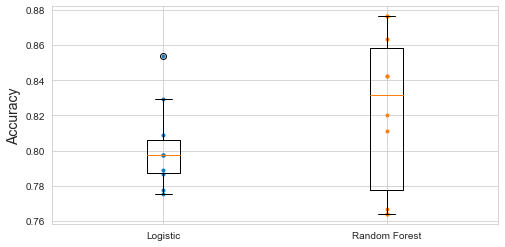

In [53]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, logmodel_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([logmodel_scores, forest_scores], labels=("Logistic","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

## Using GridSearch to optimize Random Forest hyperparameters

In [54]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier(random_state=101)
n_estimators = [50, 100, 500]
max_depth = [4, 8, 16, 32]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   13.4s finished


In [55]:
gridF.best_score_

0.835016835016835

In [56]:
gridF.best_params_

{'max_depth': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [57]:
bestE = gridF.best_estimator_ 

In [58]:
bestE_scores = cross_val_score(bestE, X_train, y_train, cv=10)
bestE_scores.mean()

0.8328677221654749

Using Gridsearch we were able to improve a litlle bit the Accuracy score, but to really improve the model we should carry out additionnal feature engineering on the data. 

## More Feature engineering

### Custom Transformers

In [59]:
# This is not actually the numerical attributes, but the atributes required to create the numerical features
num_attribs = ['Pclass','Age', 'SibSp', 'Parch', 'Fare' ]
# This is not actually the categorical attributes, but the atributes required to create the categorical features
cat_attribs = ['Pclass','Name', 'Sex', 'SibSp', 'Parch','Cabin' ,'Embarked']
train_num = train[num_attribs]
train_cat = train[cat_attribs]

In [60]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Create a class to build the numerical features

In [61]:
#from sklearn.base import BaseEstimator, TransformerMixin
import re
# column index
pclass_ix, age_ix, sibsp_ix, parch_ix, fare_ix = 0, 1, 2, 3, 4

class CombinedNumAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_age_times_class = True): # no *args or **kargs
        self.add_age_times_class = add_age_times_class
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        Family_size = (X[:,sibsp_ix] + X[:,parch_ix] + 1)
        Age_times_class = X[:,age_ix] * X[:,pclass_ix]
        Fare_per_family_member = X[:,fare_ix]  / Family_size        
        if self.add_age_times_class:
            # We will only manage age and Fare as numeric plus Age_times_class and Fare_per_family_member 
            return np.c_[X[:,[age_ix, fare_ix]], Age_times_class,Fare_per_family_member]
        else:
            return np.c_[X[:,[age_ix, fare_ix]], Fare_per_family_member]

num_attr_adder = CombinedNumAttributesAdder(add_age_times_class = True)
train_num_extra_attribs = num_attr_adder.transform(train_num.values)

In [62]:
train_num_extra_attribs

array([[22.     ,  7.25   , 66.     ,  3.625  ],
       [38.     , 71.2833 , 38.     , 35.64165],
       [26.     ,  7.925  , 78.     ,  7.925  ],
       ...,
       [     nan, 23.45   ,      nan,  5.8625 ],
       [26.     , 30.     , 26.     , 30.     ],
       [32.     ,  7.75   , 96.     ,  7.75   ]])

In [63]:
train_num_extra_attribs = pd.DataFrame(train_num_extra_attribs, columns = ['Age', 'Fare', 
                          'Age_times_class','Fare_per_family_member'],
                         index= train.index ) 

In [64]:
train_num_extra_attribs.head()

,Age,Fare,Age_times_class,Fare_per_family_member
0,22.0,7.2500,66.0,3.62500
1,38.0,71.2833,38.0,35.64165
2,26.0,7.9250,78.0,7.92500
3,35.0,53.1000,35.0,26.55000
4,35.0,8.0500,105.0,8.05000


In [65]:
train_num_extra_attribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age                       714 non-null float64
Fare                      891 non-null float64
Age_times_class           714 non-null float64
Fare_per_family_member    891 non-null float64
dtypes: float64(4)
memory usage: 28.0 KB


### Create a class to build the categorical features

In [66]:
#cat_attribs = ['Pclass','Name', 'Sex', 'SibSp', 'Parch','Cabin' ,'Embarked']
pclass_ix, name_ix, sex_ix, sibsp_ix, parch_ix, cabin_ix, embarked_ix = 0, 1, 2, 3, 4, 5, 6
class CombinedCatAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_deck = True): # no *args or **kargs
        self.add_deck = add_deck
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        # Make sure we have a Numpy ndarray for the transform
        if isinstance(X, pd.DataFrame):
            Xt = X.values
        else:
            Xt = X
        Title = np.array([re.sub(r'.* ([A-Z][a-z]+)\..*',r'\1',a) for a in Xt[:,name_ix].tolist()])
        Name_num_words = np.array([len(re.findall(r'[ ]+',a)) + 1  for a in Xt[:,name_ix].tolist()])
        Deck = np.array([ np.char.ljust(str(a), width=1) for a in Xt[:,cabin_ix].tolist()] ) 
        Deck [Deck == 'n'] = 'M'
        Multi_cabin = ((np.array( [ len(re.findall(r'[A-Z]',a)) for a in Xt[:,cabin_ix].astype('str').tolist() ]) > 1) &\
                           ~(Deck == 'F')).astype('int')
        Family_size = (Xt[:,sibsp_ix] + Xt[:,parch_ix] + 1)
        Is_alone = (Family_size == 1).astype('int')

        if self.add_deck:
            return np.c_[Xt[:,[pclass_ix, sex_ix, sibsp_ix, parch_ix, embarked_ix]], Title, Name_num_words, 
                         Multi_cabin, Deck, Family_size, Is_alone]
                    
        else:
            return np.c_[Xt[:,[pclass_ix, sex_ix, sibsp_ix, parch_ix, embarked_ix]], Title, Name_num_words, 
                         Multi_cabin, Family_size, Is_alone]
                   

cat_attr_adder = CombinedCatAttributesAdder(add_deck = True)
train_cat_extra_attribs = cat_attr_adder.transform(train_cat)

In [67]:
train_cat_extra_attribs = pd.DataFrame(train_cat_extra_attribs, 
                                       columns = ['Pclass', 'Sex', 'sibsp','parch', 'embarked',
                          'Title','Name_num_words', 'Multi_cabin', 'Deck', 'Family_size', 'Is_alone'],
                         index= train.index )

In [68]:
train_cat_extra_attribs.head()

,Pclass,Sex,sibsp,parch,embarked,Title,Name_num_words,Multi_cabin,Deck,Family_size,Is_alone
0,3,male,1,0,S,Mr,4,0,M,2,0
1,1,female,1,0,C,Mrs,7,0,C,2,0
2,3,female,0,0,S,Miss,3,0,M,1,1
3,1,female,1,0,S,Mrs,7,0,C,2,0
4,3,male,0,0,S,Mr,4,0,M,1,1


In [69]:
train_cat_extra_attribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Pclass            891 non-null object
Sex               891 non-null object
sibsp             891 non-null object
parch             891 non-null object
embarked          889 non-null object
Title             891 non-null object
Name_num_words    891 non-null object
Multi_cabin       891 non-null object
Deck              891 non-null object
Family_size       891 non-null object
Is_alone          891 non-null object
dtypes: object(11)
memory usage: 76.7+ KB


In [70]:
train_cat_extra_attribs['Multi_cabin'].value_counts()

0    871
1     20
Name: Multi_cabin, dtype: int64

### Rebuild the pipelines

In [71]:
num_pipeline = Pipeline([
        ('Groupimputer', GroupImputer(group_cols=['Pclass'], target='Age', metric='median')), 
        ('attribs_adder', CombinedNumAttributesAdder(add_age_times_class = True)),
        ('std_scaler', StandardScaler())
    ])

train_num_tr = num_pipeline.fit_transform(train_num)

In [72]:
pd_train_num_tr = pd.DataFrame(train_num_tr)

In [73]:
pd_train_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
0    891 non-null float64
1    891 non-null float64
2    891 non-null float64
3    891 non-null float64
dtypes: float64(4)
memory usage: 28.0 KB


In [74]:
cat_pipeline = Pipeline([
        ('cat_attribs_adder', CombinedCatAttributesAdder(add_deck = True)),
        ('imputer', SimpleImputer(strategy="most_frequent")) ,
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

train_cat_tr = cat_pipeline.fit_transform(train_cat.values)

In [75]:
pd_train_cat_tr = pd.DataFrame(train_cat_tr)

In [77]:
pd_train_cat_tr.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
64    0
65    0
66    0
67    0
68    0
Length: 69, dtype: int64

In [78]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [79]:
X_train = full_pipeline.fit_transform(train)
y_train = label

## Retry Random Forest model 

In [80]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=101)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8137538304392239

### Grid Search 

In [81]:
n_estimators = [50, 100, 500, 800]
max_depth = [4, 8, 16, 32, 48]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5] 
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
              min_samples_leaf = min_samples_leaf)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   46.1s finished


In [82]:
gridF.best_score_

0.8395061728395061

In [83]:
gridF.best_params_

{'max_depth': 32,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

## Apply the best model to the test dataset

In [85]:
bestE = gridF.best_estimator_ 

In [86]:
X_test = full_pipeline.transform(test)

y_pred = bestE.predict(X_test)

In [87]:
test_ids = test["PassengerId"]
submission_df = {"PassengerId": test_ids,
                 "Survived": y_pred}
submission = pd.DataFrame(submission_df)

In [88]:
submission.to_csv("submission.csv",index=False)

## Conclusion   

We got an accuracy score of 0.7775 on the test set according Kaggle. This is not a great score but the goal here was mainly to work on the data pipeline and feature engineering. 
The next action to improve the score would me to use an ensemble model including several kind of models: Linear Regression, SVM, ...